In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df2=pd.read_csv(r"C:\Users\navya\OneDrive\Documents\Sales_Analysis_Project\Data\sales_data_cleaned.csv")
df2.head()

,Date,Customer_ID,Product_Category,Product_Name,Units_Sold,Unit_Price,Region,Sales_Rep,Revenue
0,2023-11-24,CUST1070,Stationery,Pen,17,495,North,Bob,8415
1,2023-02-27,CUST1021,Clothing,Pen,1,544,South,Alice,544
2,2023-01-13,CUST1033,Electronics,Laptop,16,1356,South,Alice,21696
3,2023-05-21,CUST1067,Stationery,T-Shirt,12,175,West,Charlie,2100
4,2023-05-06,CUST1077,Stationery,Phone,19,364,South,Ethan,6916


## Bar Chart: Top 5 Products by Revenue ##

C:\Users\navya\AppData\Local\Temp\ipykernel_193568\1585842133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_revenue, x="Revenue", y="Product_Name", palette="coolwarm")


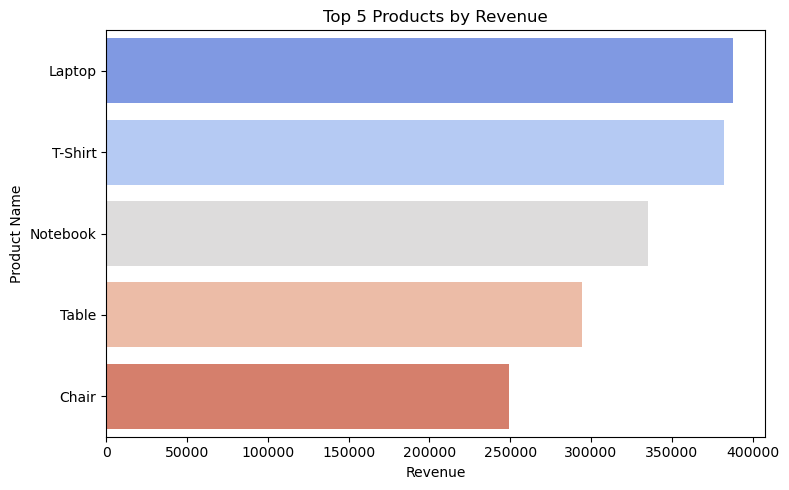

In [5]:

top5_revenue = df2.groupby("Product_Name")["Revenue"].sum().sort_values(ascending=False).head(5).reset_index()


plt.figure(figsize=(8,5))
sns.barplot(data=top5_revenue, x="Revenue", y="Product_Name", palette="coolwarm")
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


## Line Graph: Monthly Revenue Trend ##

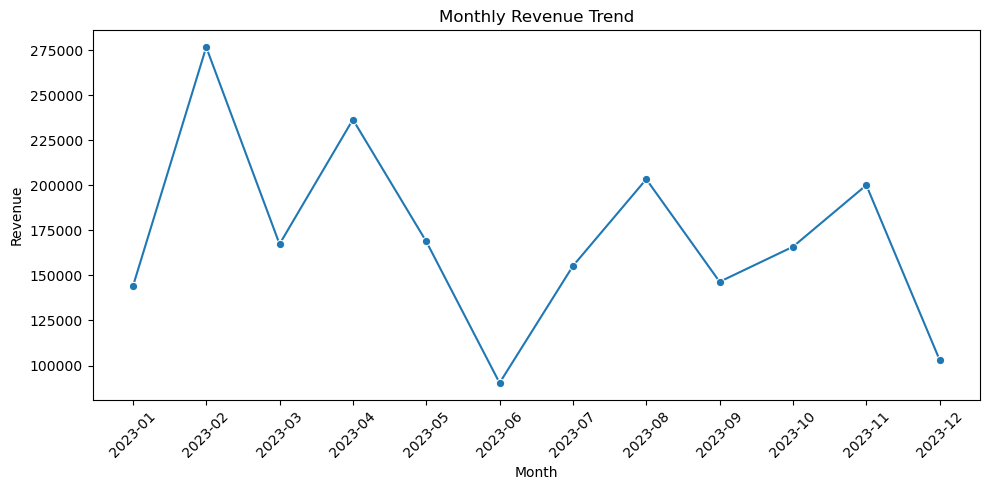

In [13]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Yearmonth'] = df2['Date'].dt.to_period('M').astype(str)

monthly_revenue = df2.groupby('Yearmonth')['Revenue'].sum().reset_index()


plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue, x='Yearmonth', y='Revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pie Chart: Region-wise Revenue Contribution ##

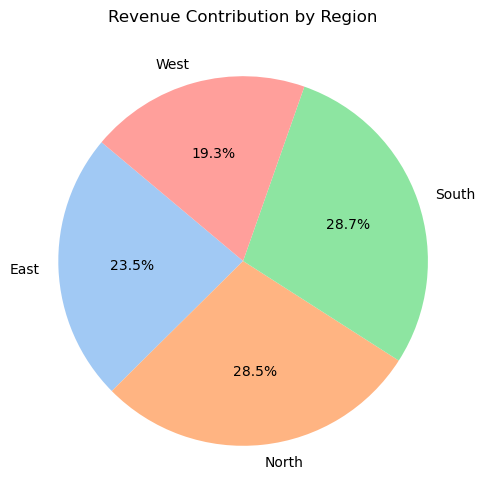

In [15]:

region_revenue = df2.groupby('Region')['Revenue'].sum()


plt.figure(figsize=(6,6))
plt.pie(region_revenue, labels=region_revenue.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Revenue Contribution by Region")
plt.show()


## Table: Sales rep performance summary ##

In [17]:

salesrep_revenue = df2.groupby("Sales_Rep")["Revenue"].sum().sort_values(ascending=False).reset_index()

salesrep_revenue.style.format({"Revenue": "${:,.0f}"}).set_caption("Sales Representative Performance Summary")


,Sales_Rep,Revenue
0,Alice,"$489,749"
1,Charlie,"$461,833"
2,Ethan,"$421,270"
3,Diana,"$397,523"
4,Bob,"$287,839"
